# Authors: Riccardo Ghetti, Egor Kravchenko, Huijiao Luo

## Task 1: SAOM Modeling Assumptions
Consider the assumptions of SAOMs:
1. The network-behaviour panel data are the outcome of a continuous-time
Markov chain.
2. Actors control their outgoing ties and behaviour.
3. At each step: only one tie can change, or the behaviour can increase or
decrease by one level.
4. Actors have full knowledge of the network and behaviour.

Critically examine and discuss the plausibility of the assumptions. For each
assumption, provide one example of the co-evolution of a network and an
actor-level attribute for which the assumption is a reasonable simplification
and one example for which the assumption is not tenable. You can use the
same example to illustrate the plausibility of more than one assumption.

**Solution:**

(1)The network-behaviour panel data are the outcome of a continuous-time Markov chain:

The Markovian assumption postulates that future events are conditionally independent from past events given the present, but this can be an oversimplification of certain networks like friendship because actors have memories of the past and are influenced by it regardless of the present state. For example, certain arguments don’t lead to an immediate fall out of the friendship, however discontent can stack up over time and influence future decisions.

The assumption can be reasonable for the coevolution of processes such as diplomatic ties between countries where the relationships are very formal and strongly depend on present conditions.

(2) Actors control their outgoing ties and behaviour

In this case, friendship is reasonably modelled by SAOMs, because a (sane) person has the freedom to choose which people to befriend at any point of time and how to behave. This doesn’t work for hierarchical ties, like the structure of a company. Indeed, in this case not all actors can choose who is their superior, but it is forcefully assigned to them.  

(3)At each step: only one tie can change, or the behaviour can increase or
decrease by one level.

This does not hold for very connected and small networks because usually any action or event influences more than just one tie between two actors. For instance, in friendships completely falling out with someone usually means not being in friendly terms with their friends too. Moreover

(4)Actors have full knowledge of the network and behaviour

The assumption seems reasonable for adequately small networks but fails to work when it becomes excessively large or very sparse because it is very possible for information to not reach all actors.

## Task 2: Network evaluation function

Consider a SAOM with objective function specified by the following statistics:

$$f(i, x, β) = β_{1}s_{1i}(x) + β_{2}s_{2i}(x) + β_{3}s_{3i}(x) + β_{4}s_{4i}(x) + β_{5}s_{5i}(x, v)$$

with $s_{1i}(x)$ the out-degree (density), $s_{2i}(x)$ the reciprocity, $s_{3i}(x)$ the transitive reciprocated triplets (the reciprocated tie is the tie $i ↔ j$), $s_{4i}(x)$ the indegree popularity and $s_{5i}(x, v)$ the same covariate effects. $x_{ij}$ denotes the presence or absence of a tie between actors $i$ and $j$, and $v_{i}$ denotes the covariate value for actor $i$.

**Question 1:** Give the mathematical formula for each effect.

Hint: A useful resource is the RSiena manual.

**Solution:**

(1) out-degree effect or density effect (density), defined by the out-degree
$$s_{i1}(x) = x_{i+} = \sum_{j}x_{ij}$$
where $x_{ij} = 1$ indicates presence of a tie from $i$ to $j$ while $x_{ij} = 0$ indicates absence of this tie;

(2) reciprocity effect (recip), defined by the number of reciprocated ties
$$s_{i2}(x) = \sum_{j}x_{ij}x_{ji}$$

(3)transitive triplets effect (transTrip), defined by the number of transitive patterns in $i$'s relations (ordered pairs of actors $(j, h)$ to both of whom $i$ is tied, while also $j$ is tied to $h$),
for directed networks,
$$s_{i3}(x) = \sum_{j,h} x_{ij} x_{ji} x_{ih} x_{jh}$$

(4) in-degree related popularity effect (inPop) (earlier called popularity or popularity of alter effect), defined by the sum of the in-degrees of the others to whom $i$ is tied,
$$s_{i4}(x) = \sum_{j} x_{ij} x_{+j} = \sum_{j} x_{ij} \sum_{h} x_{hj}$$

(5) covariate-alter or covariate-related popularity (altX), defined by the sum of the covariate over all actors to whom $i$ has a tie,
$$s_{i5}(x) = \sum_{j}x_{ij} v_{j}$$


**Question 2:** Given the current state of the network, with the colour of the nodes representing a binary attribute taking categories 1 (white) and 2 (gray),

Please refer the picture in the assignment document!

and given that $β_{1i} = -1.2, β_{2i} = 1.5, β_{3i} = 1, β_{4i} = 0.5$ and $β_{5i} = 1.3$, what is the probability that in the next mini-step:


In [1]:
# Parameter Setting
b1=-1.2
b2=1.5
b3=1
b4=0.5
b5=1.3

i. actor c adds a tie to b ?

| c->i | p |
| :----:  |    :----:   |
|c->a| 0.087|
|c->b| 0.712|
|c->c| 0.071|
|c->d| 0.130|

In [2]:
# actor c adds a tie to b
f_cb = b1*2+b2*1+b3+4*b4
exp_f_cb = exp(f_cb)

# actor c delete actor a
f_ca = 0
exp_f_ca = exp(f_ca)

# actor c adds a tie to d
f_cd= b1*2+b4*3+b5*1
exp_f_cd = exp(f_cd)

# actor c keeps unchanged
f_cc = 1*b1+2*b4
exp_f_cc = exp(f_cc)

# Sum up the exp(fi)
SumExp_fc = exp_f_cb + exp_f_ca + exp_f_cd + exp_f_cc

# Calculate the probability of actor c adding a tie to b
p1=exp_f_cb/SumExp_fc
p1

[1] 0.7115418

ii. actor b adds a tie to actor a ?

| b->i | p |
| :----:  |    :----:   |
|b->a| 0.900|
|b->b| 0.015|
|b->c| 0.030|
|b->d| 0.055|

In [3]:
# actor b adds a tie to a
f_ba = 2*b1+b2+b3+4*b4+b5
exp_f_ba = exp(f_ba)

# actor b deletes the tie to c
f_bc = 0
exp_f_bc = exp(0)

# actor b adds a tie to d
f_bd = 2*b1+b2+3*b4
exp_f_bd = exp(f_bd)

# actor b keeps unchanged
f_bb = b1+b4
exp_f_bb = exp(f_bb)

# Sum up the exp(fi) for actor b
SumExp_fb = exp_f_ba + exp_f_bb + exp_f_bc + exp_f_bd

# Calculate the probability of actor b adding a tie to a
p2=exp_f_ba/SumExp_fb
p2

[1] 0.9002877

iii. actor a deletes the tie to b ?

| a->i | p |
| :----:  |    :----:   |
|a->a| 0.250|
|a->b| 0.083|
|a->c| 0.555|
|a->d| 0.112|

In [4]:
# actor a deletes the tie to b
f_ab = b1+b2+b4
exp_f_ab = exp(f_ab)

# actor a deletes the tie to d
f_ad = b1+2*b4+b5
exp_f_ad = exp(f_ad)

# actor a adds a tie to c
f_ac = 3*b1+b2+b3+5*b4+b5
exp_f_ac = exp(f_ac)

# actor a keeps unchanged
f_aa = 2*b1+b2+3*b4+b5
exp_f_aa = exp(f_aa)

# Sum up exp(fi) for actor a
SumExp_fa = exp_f_aa + exp_f_ab + exp_f_ac + exp_f_ad

# Calculate the probability of actor a deleting the tie to b
p3=exp_f_ab / SumExp_fa
p3

[1] 0.08305704

iv. actor d does not change anything?

| d->i | p |
| :----:  |    :----:   |
|d->a| 0.026|
|d->b| 0.114|
|d->c| 0.766|
|d->d| 0.094|

In [5]:
# actor d keeps unchanged
f_dd = 2*b1+b2+4*b4
exp_f_dd = exp(f_dd)

# actor d adds c
f_dc = 3*b1+b2+b3+6*b4+b5
exp_f_dc = exp(f_dc)

# actor d deletes a
f_da = b1+2*b4
exp_f_da = exp(f_da)

# actor d deletes b
f_db = b1+b2+2*b4
exp_f_db = exp(f_db)

# Sum up exp(fi) for actor d
SumExp_fd = exp_f_da + exp_f_db + exp_f_dc + exp_f_dd

p4= exp_f_dd / SumExp_fd
p4

[1] 0.09380771

## Task 3: Simulations from SAOM
The file *simSAOM.R* contains the code to simulate the network evolution between two observations from a SAOM with an evaluation function specified by
outdegree, reciprocity and dyadic covariate effects statistics. It also includes
the code to produce violin plots for the triad census counts.

(1) Implement the missing code so that the function simulation can be
used to simulate the network evolution. Document the code. The algorithm is described in the file Simulating from SAOM available in the
Lecture notes and additional material section on Moodle. Unconditional
simulation is used.

Hint: a useful function for the implementation is sample.

Tip: If you want to implement an efficient code for the simulation, you can
use change statistics (How much would the statistic change if the tie is toggled?). In this way, creating the network with the toggled tie is unnecessary
for computing the effect statistics.

In [ ]:
install.packages("RSiena")
install.packages("sna")
install.packages("parallel")
install.packages("MASS")

library(RSiena)
library(sna)
library(parallel)
library(MASS)
library(network)
library(statnet.common)

In [7]:
comp_stat<-function(x1,W,i,mean_W,n){
  a=0
  b=0
  d=0
  for (k in 1:n){
    a=a+x1[i,k]  #outdegree
    b=b+x1[i,k]*x1[k,i]  #reciprocity
    d=d+x1[i,k]*(W[i,k]-mean_W)     #dyadic covariate centered effect
  }
  return(as.double(c(a,b,d)))
}

comp_prob<-function(b1,b2,b3,vect_stat,n){
  vect_prob=matrix(0,1,n)
  sum=0
  #compute the normalizer constant and save the weights
  for (k in 1:n)  {
    p=exp(b1*vect_stat[1,k]+b2*vect_stat[2,k]+b3*vect_stat[3,k])
    sum=sum+p
    vect_prob[k]=p
    }

  #normalize the probabilities
  for (k in 1:n)
    vect_prob[k]=vect_prob[k]/sum
  return(vect_prob)
}

In [8]:
# Task 3.1 ----------------------------------------------------------------
# The function "simulation" simulates the network evolution between
# two time points.
# Given the network at time t1, denoted by x1, the function simulates the
# steps of the continuous-time Markov chain defined by a SAOM with outdegree,
# recip and dyadic covariate (W matrix) statistics.
# Unconditional simulation is used.
# The function returns the network at time t2.
# The structure of the algorithm is described in the file
# _Simulating from SAOM.pdf_ available in
# the Lecture notes and additional material section on Moodle.

#' Simulate the network evolution between two time points
#'
#' @param n number of actors in the network
#' @param x1 network at time t1
#' @param W matrix of dyadic covariate
#' @param lambda rate parameter
#' @param beta1 outdegree parameter
#' @param beta2 reciprocity parameter
#' @param beta3 dyadic covariate parameter
#'
#' @return network at time t2

simulation <- function(n, x1, W, lambda, beta1, beta2, beta3) {
  t <- 0    # time
  x <- x1
  mean_W=mean(matrix(W,1,n*n))
  while (t < 1) {
    dt <- rexp(1, n * lambda)
    #draw a random actor with uniform prob from the n available
    i=sample(1:n,size=1)
    vect_stat=matrix(0,3,n)  #initialize the container of all statistics

    #computing the statistics for all choices
    for (k in 1:n){
      #if k==i we interpret it as the choice of leaving the network unchanged
      if(k==i){
        #Break is necessary to stop the computation in this iteration
        vect_stat[1:3,k]=comp_stat(x1,W,k,mean_W,n)
        break
      }

      #copy the current network for computing statistics of its variation
      x2=x
      #invert the tie i->j in the hypothetical network
      x2[i,k]=xor(x2[i,k],1)
      #compute and store the statistics for the current choice
      vect_stat[1:3,k]=comp_stat(x2,W,k,mean_W,n)

    }

    #compute the multinomial probabilities for every choice
    vect_prob=comp_prob(beta1,beta2,beta3,vect_stat,n)
    #sample the actor according to the computed probabilities
    j=sample(x=1:n,size=1,prob=vect_prob)

    if (i!=j)    #invert the tie i->j in x else do nothing
      x[i,j]=xor(x[i,j],1)
    t=t+dt
   }

  return(x)
}


(2) Consider the two adjacency matrices in the files *net1.csv* and *net2.csv*.
They are observations of two networks collected on a set of 22 actors
at time t1 and t2, respectively. Additionally, the dyadic covariate is
given in the file *W.csv*. Estimate the parameters of the SAOM with
outdegree, reciprocity and dyadic covariate effects statistics using the
function ***siena07***.

In [9]:
# Task 3.2 ----------------------------------------------------------------
# Consider the two adjacency matrices in the files net1.csv and net2.csv.
# Estimate the parameters of the SAOM with outdegree, reciprocity and
# dyadic covariate statistics using the function `siena07`.
# You can extract the estimated parameters from the `rate` and `theta`
#  components of the output object (e.g., res$rate and res$theta).

# ---MISSING---
#setwd("C:/Users/Riccardo Ghetti/Downloads/Network modeling/Assignment2/Assignment2")
net1=as.matrix(read.csv("net1.csv",header=FALSE))
net2=as.matrix(read.csv("net2.csv",header=FALSE))
W=as.matrix(read.csv("W.csv",header=FALSE))

friendship=sienaDependent(array(c(net1,net2), dim=c(22,22,2)))

dyad=coDyadCovar(W)
mydata=sienaDataCreate(friendship,dyad)
mydata

myeff=getEffects(mydata)
myeff
effectsDocumentation(myeff)

myeff=includeEffects(myeff,X,interaction1 = "dyad")

myAlgorithm <- sienaAlgorithmCreate(
  projname = "friends_W",
  nsub = 4, n3 = 3000, seed = 1908
)

model0 <- siena07(
  myAlgorithm,
  data = mydata, effects = myeff,
  returnDeps = TRUE,
  useCluster = TRUE, nbrNodes = 4, batch = FALSE
)
rate=model0$rate
betas=model0$theta
rm(model0)

Dependent variables:  friendship 
Number of observations: 2 

Nodeset                  Actors 
Number of nodes              22 

Dependent variable friendship
Type               oneMode   
Observations       2         
Nodeset            Actors    
Densities          0.17 0.28 

Constant dyadic covariates:  dyad 

,name,effectName,functionName,shortName,interaction1,interaction2,type,basicRate,include,randomEffects,⋯,effect3,interactionType,local,setting,effectFn,statisticFn,netType,groupName,group,effectNumber
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,⋯,<int>,<chr>,<lgl>,<chr>,<list>,<list>,<chr>,<chr>,<dbl>,<int>
friendship.rate.1,friendship,basic rate parameter friendship,Amount of network change,Rate,,,rate,TRUE,TRUE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,1
friendship.rate.2,friendship,outdegree effect on rate friendship,Amount of change x outdegrees,outRate,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,2
friendship.rate.3,friendship,indegree effect on rate friendship,Amount of change x indegrees,inRate,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,3
friendship.rate.4,friendship,reciprocity effect on rate friendship,Amount of change x reciprocity,recipRate,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,4
friendship.rate.5,friendship,effect 1/outdegree on rate friendship,Amount of change x (1/outdegrees),outRateInv,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,5
friendship.rate.6,friendship,effect ln(outdegree+1) on rate friendship,Amount of change x ln(outdegrees+1),outRateLog,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,6
friendship.rate.7,friendship,effect 1/indegree on rate friendship,Amount of change x (1/indegrees),inRateInv,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,7
friendship.rate.8,friendship,effect ln(indegree+1) on rate friendship,Amount of change x ln(indegrees+1),inRateLog,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,8
friendship.rate.9,friendship,effect 1/reciprocity on rate friendship,Amount of change x (1/reciprocity),recipRateInv,,,rate,FALSE,FALSE,FALSE,⋯,0,,TRUE,,NULL,NULL,oneMode,Group1,1,9


Effects documentation written to file myeff.html .
  effectName include fix   test  initialValue parm
1 dyad       TRUE    FALSE FALSE          0   0   
If you use this algorithm object, siena07 will create/use an output file Siena.txt .


Warning message:
“no DISPLAY variable so Tk is not available”
No X11 device available, forcing use of batch mode




Start phase 0 
theta: 0.861 0.000 0.000 

Start phase 1 
Phase 1 Iteration 1 Progress: 0%
Phase 1 Iteration 5 Progress: 0%
Phase 1 Iteration 25 Progress: 0%
Phase 1 Iteration 45 Progress: 0%
theta: 0.7959 0.1344 0.0736 

Start phase 2.1
Phase 2 Subphase 1 Iteration 1 Progress: 5%
Phase 2 Subphase 1 Iteration 2 Progress: 5%
theta 0.716 0.263 0.175 
ac 0.622 1.740 2.590 
Phase 2 Subphase 1 Iteration 3 Progress: 5%
Phase 2 Subphase 1 Iteration 4 Progress: 5%
theta 0.661 0.405 0.302 
ac 1.314 0.566 2.149 
Phase 2 Subphase 1 Iteration 5 Progress: 5%
Phase 2 Subphase 1 Iteration 6 Progress: 5%
theta 0.840 0.311 0.311 
ac 0.769 0.178 1.788 
Phase 2 Subphase 1 Iteration 7 Progress: 5%
Phase 2 Subphase 1 Iteration 8 Progress: 5%
theta 0.955 0.182 0.285 
ac 0.734 0.177 1.791 
Phase 2 Subphase 1 Iteration 9 Progress: 5%
Phase 2 Subphase 1 Iteration 10 Progress: 5%
theta 0.941 0.188 0.274 
ac 0.567 0.164 1.705 
theta 0.820 0.285 0.253 
ac -0.330 -0.128  0.867 
theta: 0.820 0.285 0.253 

Start pha

(3) Conditioning on the first observation, generate 1,000 simulations of the
network evolution using the function simulation developed in (1) and
setting the parameters with the results of the model estimated in (2).
Compute the triad census counts for each simulated network. Save the
results in an R object1, named triadCensus, in which rows are the index
of a simulated network and columns are the type of triads.

Hint: use the function ***triad.census()*** from the sna package to compute the
triad census counts.

In [10]:
# Task 3.3 ----------------------------------------------------------------
# Conditioning on the first observation, generate 1,000 simulations of the
# network evolution
# Compute the triad census counts for each simulated network.
# Save the results in an object, named `triadCensus`, in which rows are
# the index of a simulated network and columns are the type of triads.
# Column names should use the triad type name, e.g., "003", "012", "102", ...

results=array(0,dim=c(1000,22,22))
beta1=betas[1]
beta2=betas[2]
beta3=betas[3]

for (i in 1:1000){
  results[i,1:22,1:22]=simulation(22,net1,W,rate,beta1,beta2,beta3)
}
triadCensus=triad.census(results)

(4) Use the simulated values of the triad census counts to evaluate the
model's goodness of fit. The second part of the code was written to
this aim; complete the missing pieces of code to produce the violin plots.
Additionally, write the code to compute the Mahalanobis distance and
the p-value used in RSiena to assess the fit of the model with respect
to the triad census auxiliary statistic. Remember to drop statistics with
variance of 0 for the plot and Mahalanobis distance computation; report
which statistics suffer this issue. The code should compute the following
quantities:

**i. Standardized the simulated network stats.**

In [11]:
# Task 3.4 ----------------------------------------------------------------
## i. standardized the simulated network stats. ----
##   Name the resulting object as triadCensusStd

triad_stat=matrix(0,16,2)

for (e in 1:16){
  triad_stat[e,1]=mean(triadCensus[1:1000,e]) #the mean of each column
  triad_stat[e,2]=sd(triadCensus[1:1000,e]) #its standard deviation
}

triadCensusStd=matrix(0,1000,16)

for(e in 1:16){
  average_e=triad_stat[e,1]
  sd_e=triad_stat[e,2]
  for (g in 1:1000){
    triadCensusStd[g,e]=(triadCensus[g,e]-average_e)/sd_e  #standardize the values for each network
  }
}

**ii. Variance-covariance matrix and its generalized inverse.**  

In [12]:
## ii. variance-covariance matrix and its generalized inverse.         ----

p_h=cov(triadCensusStd,triadCensusStd)  #compute the covariance matrix
p_inv=ginv(p_h)                         #compute its generalized inverse

**iii. Standardized the observed values of the triad census counts.**

In [13]:
## iii. standardized the observed values of the triad census counts    ----
##  in the second observation using values from i.

net2

Obs_stat=triad.census(net2)
for (e in 1:16){
  Obs_stat[e]=(Obs_stat[e]-triad_stat[e,1])/triad_stat[e,2] #normalize obs stat
}


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
0,0,1,1,0,1,0,1,0,1,⋯,1,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,1,1,1,⋯,1,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,1,0,0,⋯,0,1,0,1,0,0,0,0,1,0
0,0,1,0,0,0,0,1,0,0,⋯,0,0,1,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,1,0,1,0,0,0,1,⋯,0,0,0,0,0,1,0,0,0,1
0,1,1,0,0,1,1,1,0,1,⋯,0,0,1,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0,⋯,0,1,1,0,0,0,0,0,0,1


**iv. Monte-Carlo Mahalanobis distance computation.**

In [14]:
## iv. Monte-Carlo Mahalanobis distance computation                                ----
# Compute the Mahalanobis distance using the mhd function for
# the auxiliar statistics of the simulated networks and the observed network.
# Remember to drop statistics with variance of 0 for the plot and
# Mahalanobis distance computation, report which statistics suffer this issue.

#' Compute the Mahalanobis distance
#'
#' @param auxStats numerical vector with the mean centered or standardized
#'   auxiliar statistics
#' @param invCov numerical matrix with the inverse of the variance-covariance
#'   matrix of the auxiliar statistics in the simulated networks
#'
#' @return numeric value with the Mahalanobis distance of auxiliar stats
#'
#' @examples
#' mhd(c(2, 4) - c(1.5, 2), solve(matrix(c(1, 0.8, 0.8, 1), ncol = 2)))
mhd <- function(auxStats, invCov) {
  t(auxStats) %*% invCov %*% auxStats
  }

mahal=matrix(0,1001,1)

for(e in 1:1000){
  mahal[e]=mhd(triadCensusStd[e,1:16], p_inv)
}

mahal[1001]=mhd(t(Obs_stat), p_inv)


**v. Monte-Carlo p-value computation.**

[1] 0

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


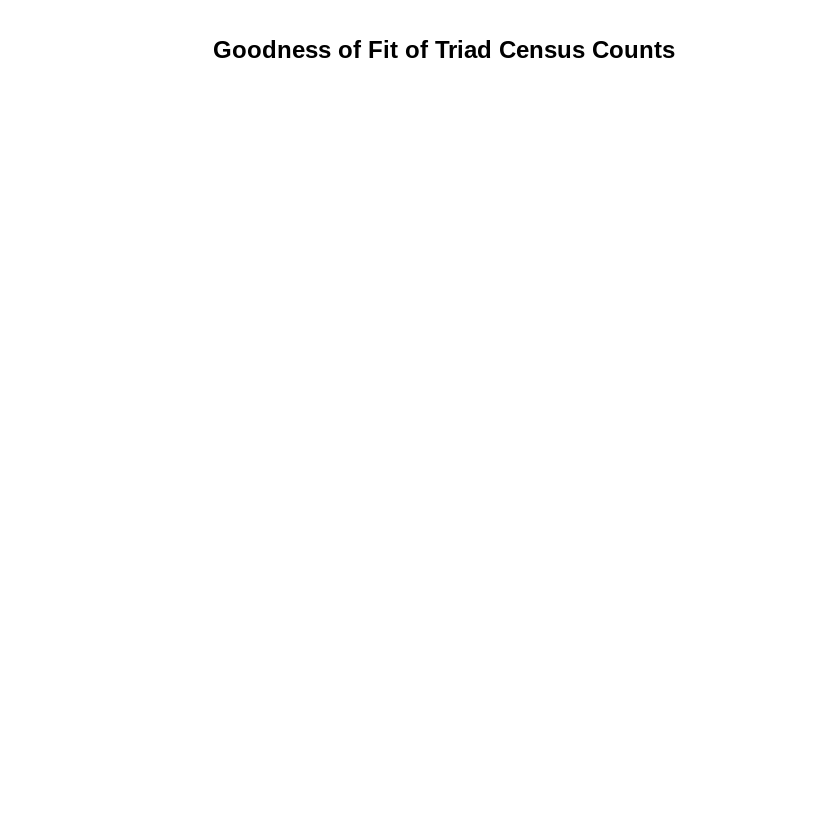

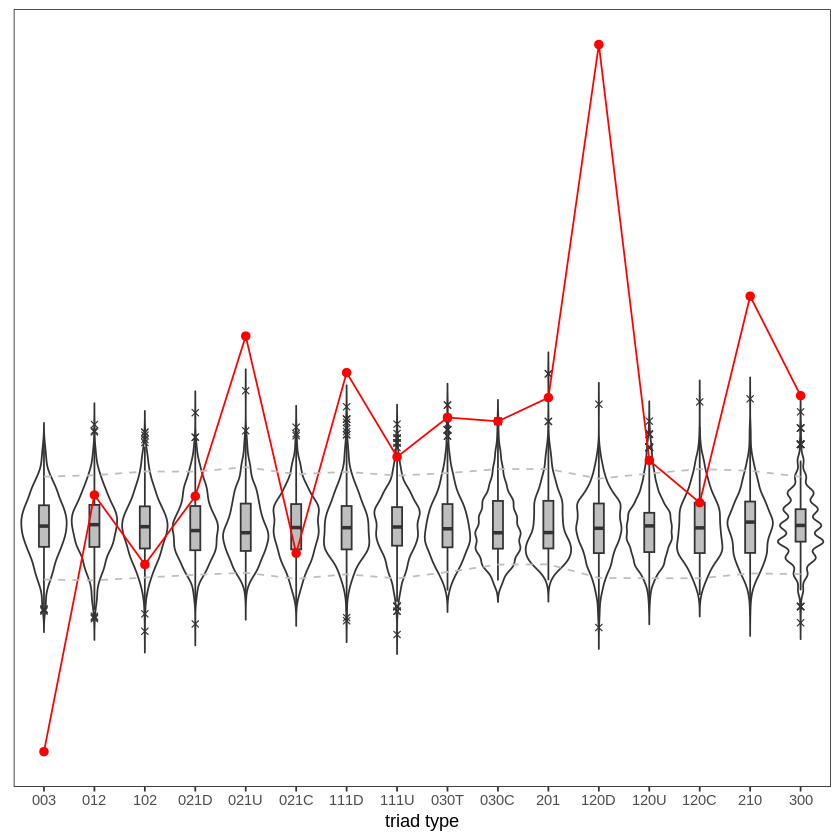

In [15]:
## v. Monte-Carlo p-value computation                                ----
# Compute the proportion of simulated networks where the distance is
# equal or greater than the distance in the observed network.

p_val=0
for (e in 1:1000){
  if(mahal[e]>=mahal[1001])
    p_val=p_val+1
}
p_val=p_val/1000
p_val

# violin plots ------------------------------------------------------------
# Fill out the missing part and run the code to obtain the violin plots

# install.packages(c("tidyverse", "ggplot2"))  # # run this line to install
library(tidyverse)  # used: dplyr and tidyr
library(ggplot2)
colnames(triadCensusStd)<-colnames(triadCensus)

# Given the array triadCensusStd, create a data frame from it in a long format,
# do the same for the observed network statistics at time t2.
# Named the data frame "triadCensusDf" and "triadCensusObs".
# Drops statistics with variance of 0 for the plot.

triadCensusDf <- data.frame(triadCensusStd) |>
  select(where(~ var(.) > 0)) |>  # Drop statistics with zero variance
  pivot_longer(
    everything(),
    names_to = "triad", names_pattern = "^X(.+)$",
    values_to = "nnodes"
  )

# Compute the statistics of the observed network at time t2,
#  standardized using the stats from 2.4 literal i.
obs=data.frame(Obs_stat)
triadCensusObs <- obs |>
  pivot_longer(
    everything(),
    names_to = "triad", names_pattern = "^X(.+)$",
    values_to = "nnodes"
  ) |>
  filter(triad %in% unique(triadCensusDf$triad))

# The following code computes the 5% and the 95% quantiles
# of the triad counts by type
percTriad <- triadCensusDf |>
  group_by(triad) |>
  summarise(
    quant05 = quantile(nnodes, prob = 0.05),
    quant95 = quantile(nnodes, prob = 0.95)
  ) |>
  pivot_longer(
    starts_with("quant"),
    names_to = "quant", names_pattern = "quant(.+)",
    values_to = "nnodes"
  )

plot.new()
# The following code produces the violin plots
ggplot(triadCensusDf, aes(fct_inorder(triad), nnodes)) +
  geom_violin(trim = FALSE, scale = "width") +
  stat_summary(fun = mean, geom = "point", size = 2) +
  geom_boxplot(width = 0.2, fill = "gray", outlier.shape = 4) +
  geom_point(data = triadCensusObs, col = "red", size = 2) +
  geom_line(
    data = triadCensusObs, aes(group = 1), col = "red", linewidth = 0.5
  ) +
  geom_line(
    data = percTriad, mapping = aes(group = quant),
    col = "gray", linetype = "dashed"
  ) +
  theme_bw() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  xlab("triad type") +
  title("Goodness of Fit of Triad Census Counts")

### Conclusion

As it can be seen from the violin plots, the simulated networks for the most part don't have an accurate goodness of fit regarding the triad census. While 5 out of 16 have their observed value within the 5-95% quantile interval, all of the other types show that the observed value in net2 is a very big outlier.
This bad goodness of fit is also exacerbated by the p_value of the Mahalanobis
distance: 0; indeed it can be seen that the real value is 576 while the simulated ones rarely exceed 20. Therefore our simulations don't model in a satisfactory way the data.

## Task 4: Estimation and interpretation of SAOMs

The folder *Glasgow.zip* contains data collected by Michell and West (1996) under the “Teenage Friends and Lifestyle Study” 2. The dataset was collected on a cohort of 160 students followed over two years starting in February 1995, when the pupils were aged 13, and ending in January 1997. The friendship network of the pupils was observed at three-time points. Pupils were asked to name up to six friends and provide information on their socio-demographic
characteristics along with the use of substances, such as tobacco and alcohol consumption. In the following, we analyse the data of the 129 pupils who were present at all three-time points.
The folder contains the following files
- f1, f2, f3.csv: adjacency matrices of the friendship networks
- demographic.csv: data frame containing information on gender (1 boy,
2 girl) and age
- logdistance.csv: logarithm of the distance (in kilometers) between the
houses of the pupils
- alcohol.csv: alcohol consumption coded as 1 (non), 2 (once or twice a
year), 3 (once a month), 4 (once a week) and 5 (more than once a week);

We are interested in investigating the co-evolution of friendship (network dependent variable) and alcohol consumption (behavioral dependent variable).

In [16]:
source("siena07ToConverge.R")

# Importing the adjacency matrices of the networks
net1 <- as.matrix(read.csv("f1.csv", header = FALSE))
net2 <- as.matrix(read.csv("f2.csv", header = FALSE))
net3 <- as.matrix(read.csv("f3.csv", header = FALSE))

num_pupils <- 129

# Reading the demographic and alcohol consumption characteristics of the students
attributes <- read.csv("demographic.csv", header = TRUE)
alcohol <- as.matrix(
  read.csv("alcohol.csv", header = TRUE)
)

# Reading the information on the distance between the houses of the pupils

log_distance <- as.matrix( read.csv("logdistance.csv", header = FALSE))

(2.1) Start by computing the Jaccard index to evaluate if the data contains
enough information to investigate the evolution of the friendship network. Comment on the results.

In [17]:
# Creation of a Siena network object
friendship <- sienaDependent(
  array(c(net1, net2, net3), dim = c(num_pupils, num_pupils, 3))
)


gender <- coCovar(attributes$gender)
age <- coCovar(attributes$age)
log_dist <- coDyadCovar(log_distance)

#The alcohol consumption is treated as a dependent variable.
alco_beh <- sienaDependent(alcohol, type = "behavior")

mydata <- sienaDataCreate(friendship, gender, age, log_dist, alco_beh)
mydata

## precondition of the analysis
# Data description
# Stability: Jaccard index
print01Report(mydata, modelname = "Glasgow")


Dependent variables:  friendship, alco_beh 
Number of observations: 3 

Nodeset                  Actors 
Number of nodes             129 

Dependent variable friendship       
Type               oneMode          
Observations       3                
Nodeset            Actors           
Densities          0.027 0.027 0.028

Dependent variable alco_beh
Type               behavior
Observations       3       
Nodeset            Actors  
Range              0 - 5   

Constant covariates:  gender, age 
Constant dyadic covariates:  log_dist 

**Conclusion:**
Jacard index is 0.304 for observations 1 \& 2, and is 0.351 for observations 2 \& 3. Both these numbers are greater than 0.3, so data contains enough information to investigate the evolution of the friendship network.

(2.2) Specify a reasonable model to test the following hypotheses:


In [ ]:
myeff <- getEffects(mydata)
myeff

#effectsDocumentation

H1: Students tend to be friends with popular pupils.

Idea: To test the hypothesis H1, we include the in-degree popularity effect, which reflects tendencies to dispersion in in-degrees of the actors; or, tendencies for actors with high in-degrees to attract extra incoming ties 'because' of their high current in-degrees

In [19]:
#We include  transitive triplets effect to represent the dynamics in local structure
myeff <- includeEffects(myeff, transTrip)

# To test the hypothesis H1,
#we include the in-degree popularity effect, which reflects tendencies to dispersion in in-degrees of the actors; or,
#tendencies for actors with high in-degrees to attract extra incoming ties ‘because’ of their high current in-degrees
myeff <- includeEffects(myeff, name = "friendship", inPop)

  effectName          include fix   test  initialValue parm
1 transitive triplets TRUE    FALSE FALSE          0   0   
  effectName            include fix   test  initialValue parm
1 indegree - popularity TRUE    FALSE FALSE          0   0   


H2: Students tend to be friends with students that live in the same
neighborhood (living nearby).

Idea: To test the hypothesis H2, we include the covariate main effect of the logarithm of the distance between the houses of the pupils.

In [20]:
#To test the hypothesis H2, we include the covariate main effect of the logarithm of the distance between the houses of the pupils
myeff <- includeEffects(myeff, X, name = "friendship", interaction1 = "log_dist")


  effectName include fix   test  initialValue parm
1 log_dist   TRUE    FALSE FALSE          0   0   


H3: Popular students tend to increase or maintain their level of alcohol consumption.

Idea: To test the hypothesis H3, we include the indegree effect for behavioral evaluation function.

In [21]:
#To test the hypothesis H3, we include the indegree effect for behavioral evaluation function.
myeff <- includeEffects(myeff, indeg, name = "alco_beh", interaction1 = "friendship")


  effectName        include fix   test  initialValue parm
1 alco_beh indegree TRUE    FALSE FALSE          0   0   



H4: Students tend to adjust their alcohol consumption to that of their friends.

Idea: To test the hypothesis H4, we include the average similarity effect, defined by the average of centered similarity scores
(of alcohol consumption) between pupil and the other pupils to whom he is tied.

In [22]:
#To test the hypothesis H4, we include the average similarity effect, defined by the average of centered similarity scores
#(of alcohol consumption) between pupil and the other pupils to whom he is tied.
myeff <- includeEffects(myeff, avSim, name = "alco_beh", interaction1 = 'friendship')

  effectName                  include fix   test  initialValue parm
1 alco_beh average similarity TRUE    FALSE FALSE          0   0   


In [ ]:
myeff

(2.3) Estimate the model, check its convergence and fit, and comment on its
parameters.

If you use this algorithm object, siena07 will create/use an output file Siena.txt .


No X11 device available, forcing use of batch mode




Start phase 0 
theta:  7.454  6.829 -1.613  0.000  0.000  0.000  0.000  0.910  1.093  0.347  0.000  0.000  0.000 

Start phase 1 
Phase 1 Iteration 1 Progress: 0%
Phase 1 Iteration 5 Progress: 0%
Phase 1 Iteration 25 Progress: 0%
Phase 1 Iteration 45 Progress: 0%
theta:  7.99309  6.88807 -1.69686  0.11292  0.09456  0.00398  0.00843  0.81553  1.09860  0.34417 -0.00756 -1.00000  0.01250 

Start phase 2.1
Phase 2 Subphase 1 Iteration 1 Progress: 6%
Phase 2 Subphase 1 Iteration 2 Progress: 6%
theta  8.58860  7.04819 -1.80835  0.38537  0.33760 -0.00489  0.01019  0.74947  1.16516  0.35619 -0.03289 -1.72945  0.02494 
ac 1.055 1.751 0.765 1.447 1.931 0.661 1.223 1.062 0.897 1.366 0.990 0.851 1.331 
Phase 2 Subphase 1 Iteration 3 Progress: 6%
Phase 2 Subphase 1 Iteration 4 Progress: 6%
theta  8.8665  7.8212 -2.0211  1.1041  0.5267 -0.0257 -0.0448  0.8822  1.3394  0.3678 -0.0270 -0.1561  0.0401 
ac 1.525 1.824 1.434 1.396 3.890 1.759 1.192 1.276 0.951 1.384 1.043 0.949 1.349 
Phase 2 Subphase 1

Estimates, standard errors and convergence t-ratios

                                               Estimate   Standard   Convergence 
                                                            Error      t-ratio   
Network Dynamics 
   1. rate constant friendship rate (period 1) 10.9853  ( 1.0148   )   -0.0330   
   2. rate constant friendship rate (period 2)  8.9495  ( 0.8403   )    0.0109   
   3. eval outdegree (density)                 -2.2933  ( 0.0871   )   -0.0249   
   4. eval reciprocity                          2.1175  ( 0.0901   )   -0.0064   
   5. eval transitive triplets                  0.4952  ( 0.0317   )   -0.0191   
   6. eval indegree - popularity               -0.0802  ( 0.0193   )   -0.0305   
   7. eval log_dist                            -0.1550  ( 0.0446   )    0.0040   

Behavior Dynamics
   8. rate rate alco_beh (period 1)             1.5389  ( 0.2482   )   -0.0281   
   9. rate rate alco_beh (period 2)             2.1666  ( 0.3599   )   -0.0100   
  10. ev

No X11 device available, forcing use of batch mode




Start phase 0 
theta: 10.9853  8.9495 -2.2933  2.1175  0.4952 -0.0802 -0.1550  1.5389  2.1666  0.2052  0.0781  7.5029  0.0681 

Start phase 2.1
Phase 2 Subphase 1 Iteration 1 Progress: 6%
Phase 2 Subphase 1 Iteration 2 Progress: 6%
theta 10.7817  9.1891 -2.2852  2.0956  0.4961 -0.0809 -0.1623  1.4322  2.1726  0.2030  0.0873  7.5525  0.0735 
ac -2.53847 -0.78459 -0.00752 -1.96624  0.89520  0.41764  6.16285 -7.44850 -1.26461  0.20187  1.26064  0.68654  0.65685 
Phase 2 Subphase 1 Iteration 3 Progress: 6%
Phase 2 Subphase 1 Iteration 4 Progress: 6%
theta 11.1853  8.8391 -2.2993  2.1230  0.4975 -0.0811 -0.1645  1.3692  2.2402  0.1988  0.0964  7.6673  0.0806 
ac  1.0326 -0.7169  0.0425 -1.5685 -1.4242  0.4489  1.2039 -0.6146 -1.4975  0.1756  1.0552  0.7307  0.3205 
Phase 2 Subphase 1 Iteration 5 Progress: 6%
Phase 2 Subphase 1 Iteration 6 Progress: 6%
theta 11.2366  8.9617 -2.2947  2.1089  0.5025 -0.0825 -0.1617  1.4614  2.2081  0.1814  0.1033  8.2931  0.0819 
ac  1.27516 -0.71295  0.00492

No X11 device available, forcing use of batch mode




Start phase 0 
theta:  7.454  6.829 -1.613  0.000  0.000  0.000  0.000  0.910  1.093  0.347  0.000  0.000  0.000 

Start phase 1 
Phase 1 Iteration 1 Progress: 0%
Phase 1 Iteration 3 Progress: 0%
Phase 1 Iteration 5 Progress: 0%
Phase 1 Iteration 15 Progress: 0%
Phase 1 Iteration 25 Progress: 0%
Phase 1 Iteration 35 Progress: 0%
Phase 1 Iteration 45 Progress: 0%
theta:  8.4542  7.4748 -1.7195  0.2385  0.2345 -0.0170 -0.0695  0.5233  1.0764  0.3218  0.0701  0.4488  0.0114 

Start phase 2.1
Phase 2 Subphase 1 Iteration 1 Progress: 6%
Phase 2 Subphase 1 Iteration 2 Progress: 6%
theta  8.6451  7.7372 -1.7895  0.4264  0.3775 -0.0266 -0.0916  0.4363  1.1025  0.3067  0.0768  0.5325  0.0114 
ac 1.147 1.266 0.862 1.334 1.677 0.753 2.002 0.927 0.888 0.895 1.061 0.877 1.009 
Phase 2 Subphase 1 Iteration 3 Progress: 6%
Phase 2 Subphase 1 Iteration 4 Progress: 6%
theta  8.65739  8.23902 -1.98396  1.08997  0.53202 -0.04928 -0.12431  0.55298  1.20376  0.30078  0.04650  1.65835  0.00112 
ac 1.239 1.4

Estimates, standard errors and convergence t-ratios

                                               Estimate   Standard   Convergence 
                                                            Error      t-ratio   
Network Dynamics 
   1. rate constant friendship rate (period 1) 10.9626  ( 1.0240   )   -0.0324   
   2. rate constant friendship rate (period 2)  8.9202  ( 0.7701   )   -0.0100   
   3. eval outdegree (density)                 -2.2942  ( 0.0892   )    0.0082   
   4. eval reciprocity                          2.1165  ( 0.0920   )    0.0223   
   5. eval transitive triplets                  0.4960  ( 0.0306   )    0.0091   
   6. eval indegree - popularity               -0.0800  ( 0.0195   )    0.0116   
   7. eval log_dist                            -0.1557  ( 0.0450   )   -0.0189   

Behavior Dynamics
   8. rate rate alco_beh (period 1)             1.5446  ( 0.2502   )   -0.0098   
   9. rate rate alco_beh (period 2)             2.1730  ( 0.3566   )    0.0107   
  10. ev

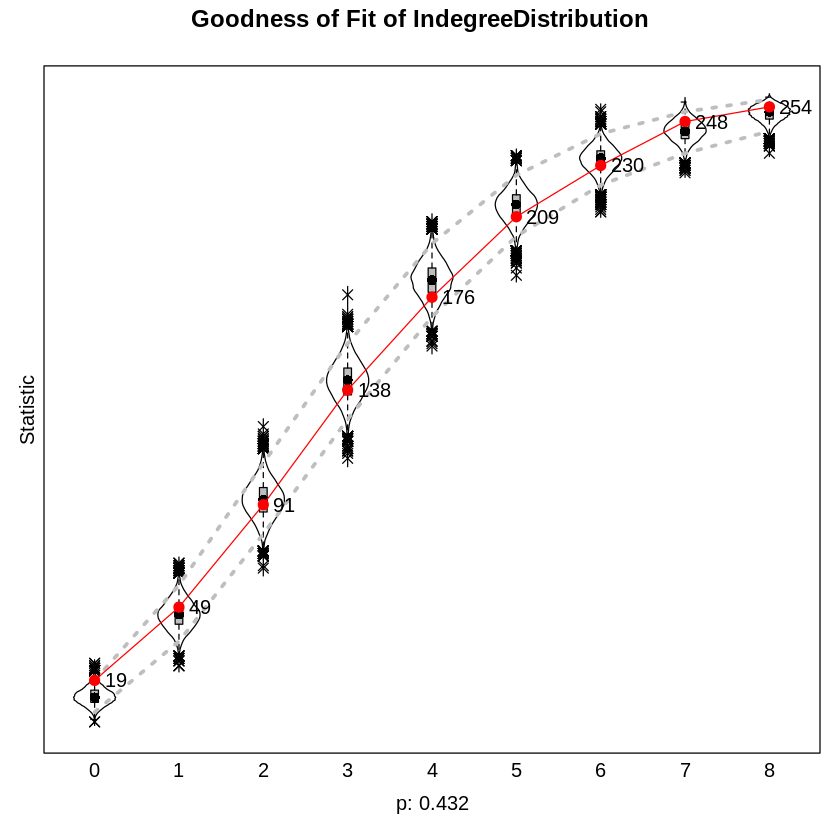

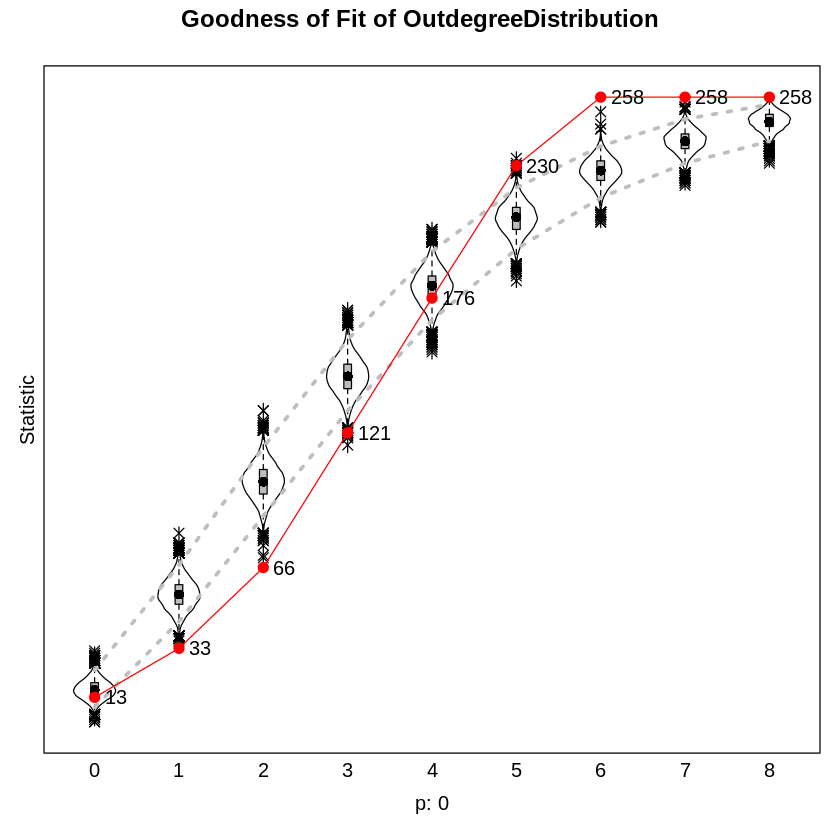

Note: some statistics are not plotted because their variance is 0.
This holds for the statistic: 5.


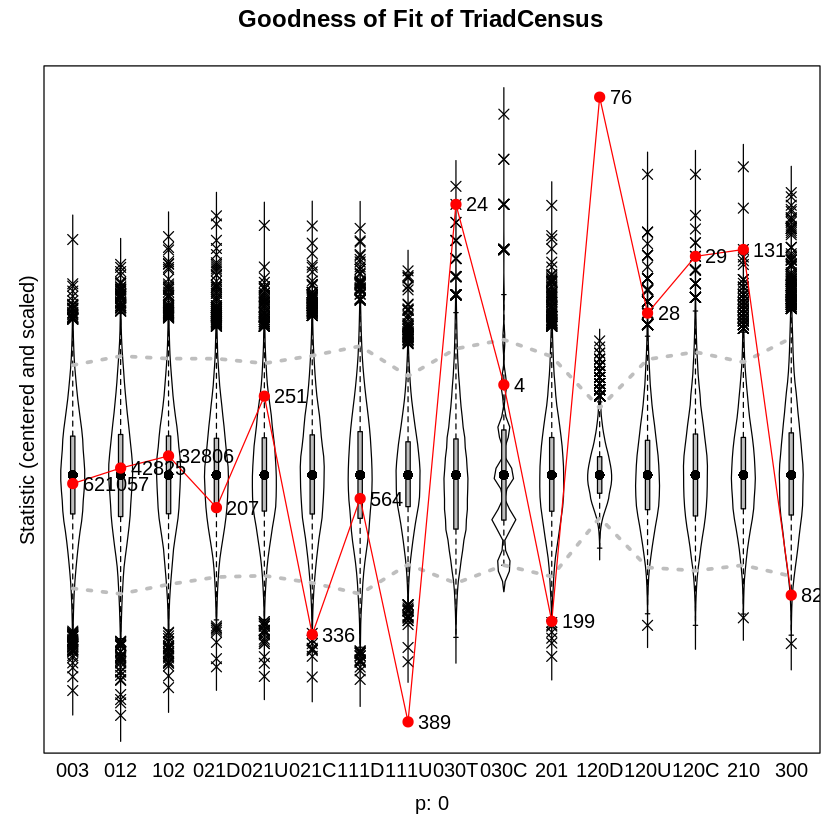

,0,1,2,3,4
max,11.000000,46.000000,126.000000,206.000000,251.000000
perc.upper,7.000000,39.000000,113.000000,190.000000,243.000000
mean,2.894700,28.307900,97.814100,175.758500,233.248000
median,3.000000,28.000000,98.000000,176.000000,233.000000
perc.lower,0.000000,18.000000,82.000000,160.000000,223.000000
min,0.000000,8.000000,59.000000,147.000000,212.000000
sd,1.750748,5.368014,7.993043,7.678989,5.212582
obs,1.000000,33.000000,97.000000,171.000000,236.000000
p>,0.776500,0.167900,0.507600,0.715800,0.271200
p>=,0.943300,0.215700,0.559000,0.759600,0.338000


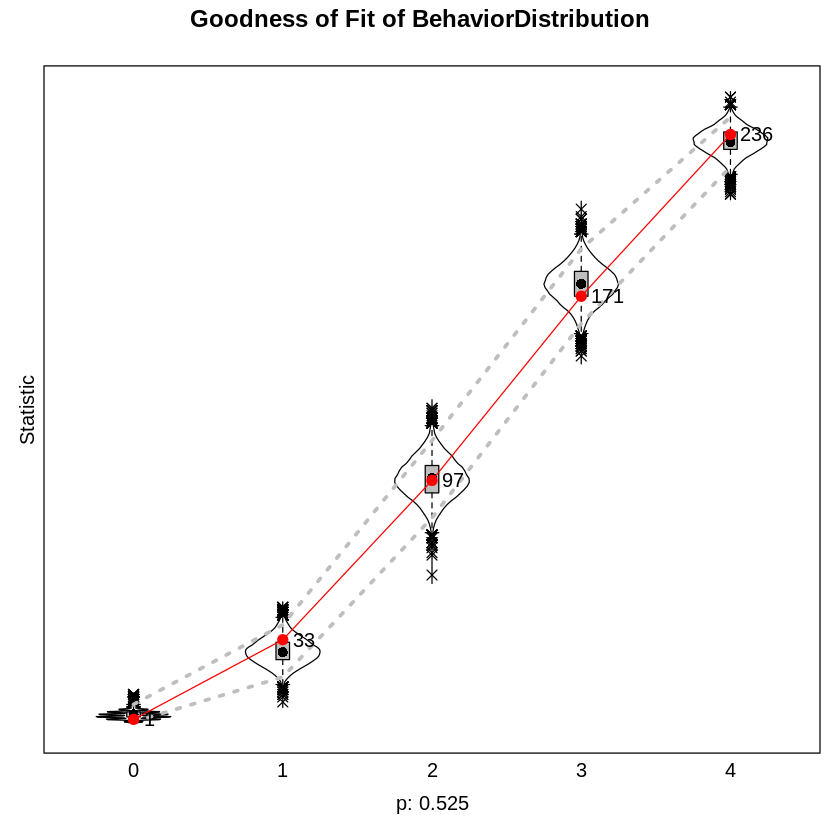

In [24]:
## Model estimation --------------------------------------------------------
# Specifying the parameter of the algorithm
myAlgorithm <- sienaAlgorithmCreate(
  projname = "friends_res",
  nsub = 4, n3 = 10000, seed = 239239
)

# Estimate the model
model1 <- siena07(
  myAlgorithm,
  data = mydata, effects = myeff,
  returnDeps = TRUE,
  useCluster = TRUE, nbrNodes = 4, batch = FALSE
)

model1


#Check the convergence of the model
t.conv <- apply(model1$sf, 2, mean) / apply(model1$sf, 2, sd)
overall <- sqrt(t(apply(model1$sf, 2, mean)) %*% solve(cov(model1$sf)) %*% apply(model1$sf, 2, mean))
#all numbers of t.conv are less than 0.1 by absolute value and the value of overall is less than 0.2.
#Thus we can conclude that the model converges well.

#We double check the convergence using siena07ToConvergence function.

  model1 <- siena07(myAlgorithm,
  data = mydata, effects = myeff, returnDeps = TRUE, prevAns = model1,
  useCluster = TRUE, nbrNodes = 4
  )

siena07ToConvergence(myAlgorithm, dat = mydata, eff = myeff)

#The again see that all t-ratios are less than 0.1 by absolute value and the overall maximum convergence ratio
#is less than 0.2. Therefore, we received another evidence of that the model converges well.

## Check the goodness of fit

# Indegree distribution
gofCoevId <- sienaGOF(
  model1,
  verbose = FALSE,
  varName = "friendship", IndegreeDistribution
)

# Outdegree distribution
gofCoevOd <- sienaGOF(
  model1,
  verbose = FALSE,
  varName = "friendship", OutdegreeDistribution
)

# Triad census
gofCoevTC <- sienaGOF(
  model1,
  verbose = FALSE,
  varName = "friendship", TriadCensus
)



# Behaviour distribution
gofCoevBeh <- sienaGOF(
  model1,
  verbose = FALSE,
  varName = "alco_beh", BehaviorDistribution,
)


plot(gofCoevId)
plot(gofCoevOd)
plot(gofCoevTC, center = TRUE, scale = TRUE)
plot(gofCoevBeh)

descriptives.sienaGOF(gofCoevBeh)


In [25]:
siena.table(model1, type = "html", sig = TRUE)

Results for model1 written to model1.html .


In [29]:
siena.table(model1, type = "tex", sig = TRUE)

Results for model1 written to model1.tex .


In [31]:
model1

Estimates, standard errors and convergence t-ratios

                                               Estimate   Standard   Convergence 
                                                            Error      t-ratio   
Network Dynamics 
   1. rate constant friendship rate (period 1) 10.9677  ( 1.0351   )   -0.0161   
   2. rate constant friendship rate (period 2)  8.9598  ( 0.7702   )    0.0484   
   3. eval outdegree (density)                 -2.2954  ( 0.0896   )   -0.0248   
   4. eval reciprocity                          2.1135  ( 0.0912   )   -0.0392   
   5. eval transitive triplets                  0.4946  ( 0.0316   )   -0.0304   
   6. eval indegree - popularity               -0.0791  ( 0.0196   )   -0.0147   
   7. eval log_dist                            -0.1543  ( 0.0442   )    0.0056   

Behavior Dynamics
   8. rate rate alco_beh (period 1)             1.5488  ( 0.2541   )   -0.0094   
   9. rate rate alco_beh (period 2)             2.1623  ( 0.3487   )   -0.0381   
  10. ev

**Comments:** If we consider the indegree distribution or behavior distribution as auxiliary statistics, the  model fits good (the red line lies in the 95% percent interval). But if we consider the outdegree distribution or triad census as auxiliary statistics, then the model fits not so good: sometimes red line is outside the 95% percent interval. But overall, it happens quite rarely, so we may assume that the model fits well enough.


(2.4) Are the hypothesis supported by the data? Argue for your answers.

**Answer:**

1. The indegree popularity. This statistics is significant under the level of 0.001. The sign of the estimated value is negative, which contradicts with the hypothesis H1.

2. The centered covariate main effect of logarithm of the distance between the houses of the pupils. This statistics is significant under the level of 0.001. The sign of the estimated value is negative, which supports the hypothesis H2.

3. The the indegree effect for behavioral evaluation function.
This statistics is not significant even under the level of 0.1.

4. The average similarity effect. This statistics is significant under the level of 0.01. The sign of the estimated value is positive, which supports the hypothesis H4.

(2.5) Given the estimated model, do we have evidence for selection processes
only, influece processes only, both selection and influence processes, or
neither? Argue for your answer.

**Answer:**
1. The hypotheses H1 and H2 are examples of selection processes. H1 describes a scenario where students are actively choosing their friends based on a specific attribute (popularity). It highlights the selection mechanism where students are drawn to others with certain social traits. H2 also reflects a selection process, as the proximity (living nearby) serves as a criterion or facilitator
for choosing friendships. This is about selecting friends based on geographic or situational factors. Thus we see evidence of selection processes.

2. On the other hand, the hypotheses H3 and H4 are examples of influence processes. H3 is not statistically relevant,
so we concentrate on H4. It describes an influence process because it focuses on how students' behaviors (alcohol consumption) are shaped by their social relationships (friends' behavior). It reflects the adjustment or conformity to peer norms. Thus we see evidence of influence processes.

(2.6) Discuss how the model could be improved (by adding new effects) so that
geodesic distances and degree distributions might be better represented.
Provide theoretical justification for the new effects you propose to add in
the model specification. You are not required to re-run the model with
the new proposed specification.

(2.7) Could you think of two other hypotheses concerning the dynamics of
friendship and alcohol consumption dynamics that a researcher can test
using SAOMs? State these hypotheses and how you would operationalize
the corresponding effects in the evaluation function.

**Answer:**

1. The first hypothesis is that male students tend to consume more alcohol. To test this we can add the main covariate effect (effFrom) to the objective function.

2. The second hypothesis is that students of the same gender tend to be friends more than students of the oppostite genders. To test this we can add covariate-related similarity (simX) effect to the objective function.